# Titanic survived Project

Name: Soham Vashi                                                                                                           
Batch : DS2402

# Project Description

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


# Attribute Information


Passenger id- Unique Id of the passenger                                                                                        
Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                                                                             
Survived- Survived (0 = No; 1 = Yes)                                                                                            
Name- Name of the passenger                                                                                                     
Sex- Sex of the passenger (Male, Female)                                                                                        
Age- Age of the passenger                                                                                                       
Sibsp- Number of Siblings/Spouses Aboard                                                                                         
Parch- Number of Parents/Children Aboard                                                                                        
Ticket- Ticket Number                                                                                                           
Fare- Passenger Fare (British pound)                                                                                            
Cabin- Cabin                                                                                                                     
Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.shape

(891, 12)

Dataset contains 891 rows and 12 columns

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
#checking for data types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data set contains two feature float64,five feature int64,five feature of object data types.

# Checking for null values

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

  There are null values in Age, Cabin and Embarked features.

<Axes: >

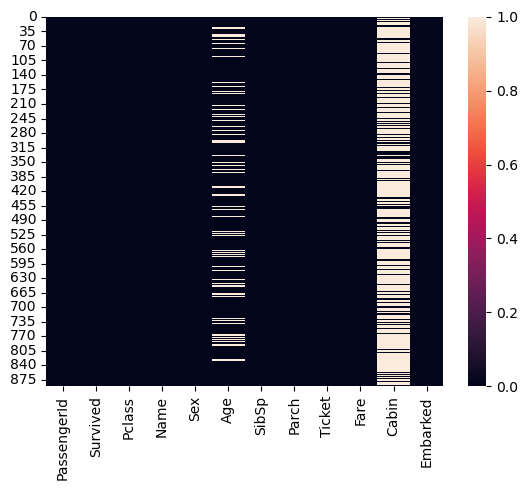

In [4]:
#visualize the null values
sns.heatmap(df.isnull())

# Handling missing values

We can observe that 'Cabin' columns contains 687 null values out of 891 rows so we will drop this coulmn.

In [5]:
#droping 'cabin' column from dataset
df=df.drop(columns='Cabin',axis=1)

In [6]:
#replacing missing values in age coulmn with mean value
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [7]:
#finding the mode value of 'Embarked' column
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Here we can see that 'S' is the most repeated value in 'Embarked' column so we will replace missing value with 'S'.

In [8]:
#replasing missing values in 'Embarked ' column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [9]:
#lets check again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

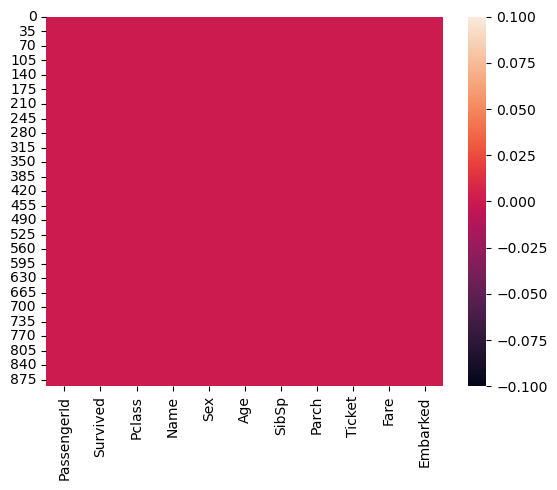

In [10]:
#visualize missing value
sns.heatmap(df.isnull())

Now there are no missing values are there in dataset.

# Statistical information about data


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This provides information count,mean value ,maximum value,minimum value, standard deviation,25th,50th and 75 th percentile value of numerical columns of dataset.

# Exploratory Data Analysis(EDA) and Visualization

In [11]:
#Finding the unique number of features
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

 This shows that Survived column which is target has two categories.                                                             
 Class feature has three categories.

In [12]:
#finding number of people survied and not survied
df['Survived'].value_counts()


0    549
1    342
Name: Survived, dtype: int64

This shows that out of 891 people 549 are not survived and 342 peoples are survived.

In [13]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

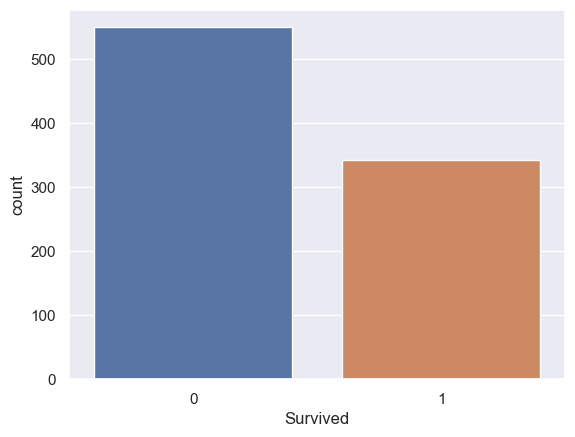

In [18]:
#count plot for "survived" column
sns.countplot(x='Survived', data=df)

In [20]:
#gender wise passengers
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are 577 males and 314 female passengers are present in the ship.

<Axes: xlabel='Sex', ylabel='count'>

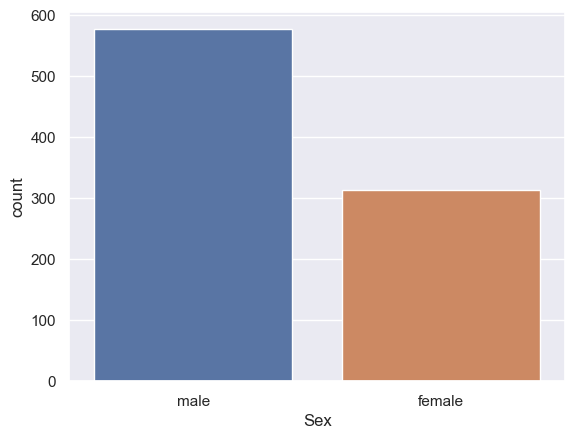

In [21]:
sns.countplot(x='Sex', data=df)

In [22]:
#Gender-wise Survival Rate of Passengers
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

1)out of 314 females 81 are not survived and 233 females are survived                                                           
2)out of 577 maled 468 males are not survived while 109 males are survived.

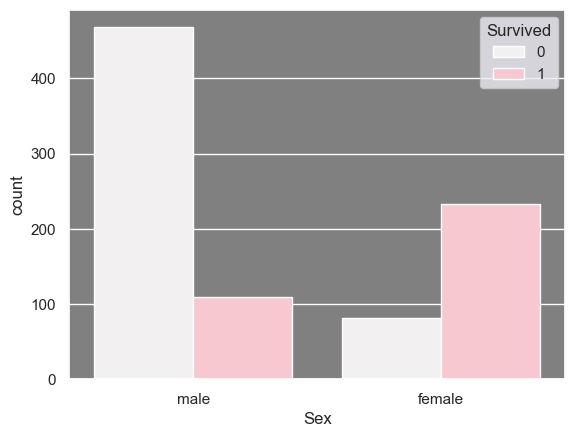

In [24]:
#visualize the number of survives based on gender
sns.countplot(x=df['Sex'],hue=df['Survived'],color='pink')
plt.gca().set_facecolor('grey')
plt.show()

More females are survied then males.

In [25]:
#class wise survivers
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

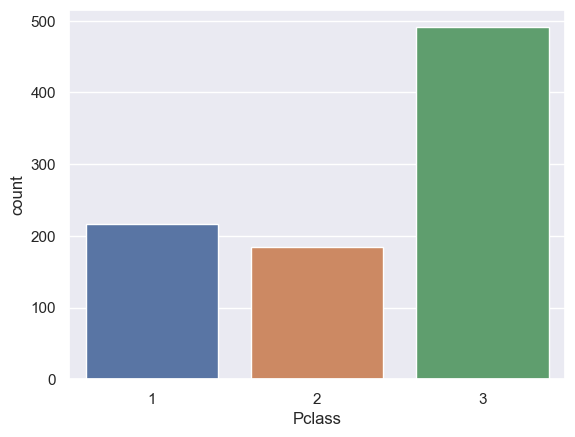

In [28]:
sns.countplot(x='Pclass', data=df)

There are more peoples at class 3 then 1 and least people at class 2.

In [30]:
#number of survivers based on class
df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

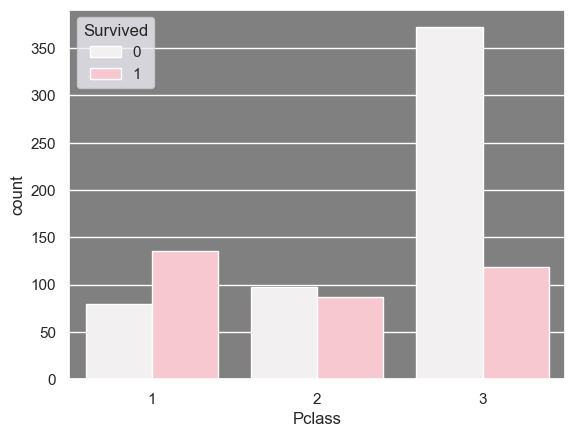

In [31]:
#visualization for survivals based on class
sns.countplot(x=df['Pclass'],hue=df['Survived'],color='pink')
plt.gca().set_facecolor('grey')
plt.show()

1)in class3 out of 491 passengers 136 peoples are survived and 80 peoples are not survived.                                     
2)in class2 out of 184 passengers 87 are survived and 97 are not survived.                                                      
3)in class1 out of 216 passengers 119 are survived and 372 are not survived.

In [33]:
#number of survivels gender wise for each class
pd.crosstab([df.Sex,df.Survived],df.Pclass, margins= True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

This shows                                                                                                                     
1)In class one 91 females ,45 males are survived and 3 females,77 males are not survived.                                      
2)In class two 70 females,17 males are survived and 6 females,91 males are not survived.                                        
3)In class three 72 females,109 males are survived and 72 females,300 males are not survived.

# Correlation

In [39]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<Axes: >

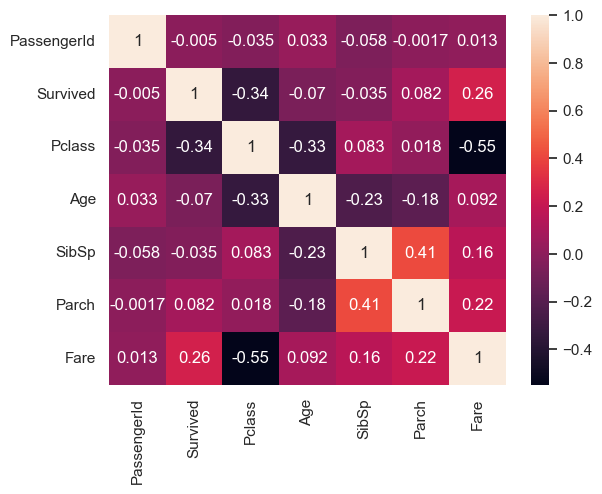

In [41]:
sns.heatmap(df.corr(),annot=True)

In [11]:
#droping unnecessary column
df.drop(['Name','PassengerId','Ticket'],axis=1,inplace=True)

In [12]:
#separating Numerical and Categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        categorical_col.append(i)
print("Categorical column :",categorical_col)
print("\n")

#checking for numerical values

numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('Numerical column :',numerical_col)

Categorical column : ['Sex', 'Embarked']


Numerical column : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


# Outliers

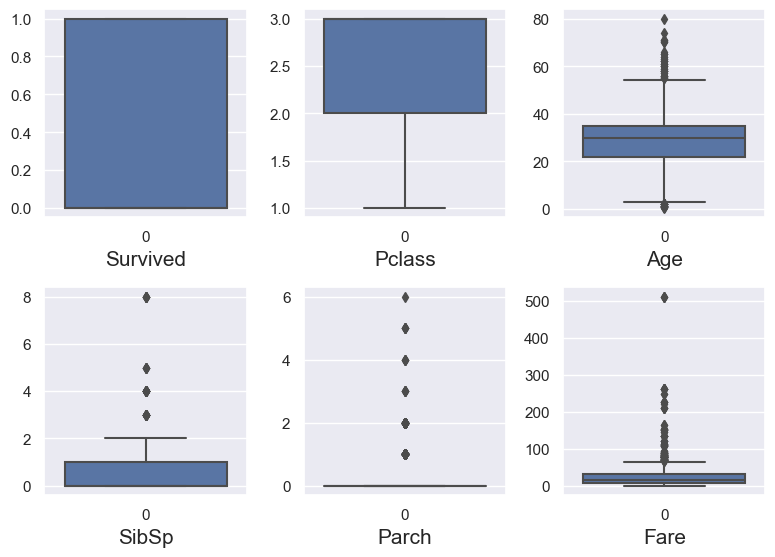

In [47]:
plt.figure(figsize=(8,8),facecolor='white')
plotnumber=1
for i in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[i],color='b')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Skewness

In [34]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

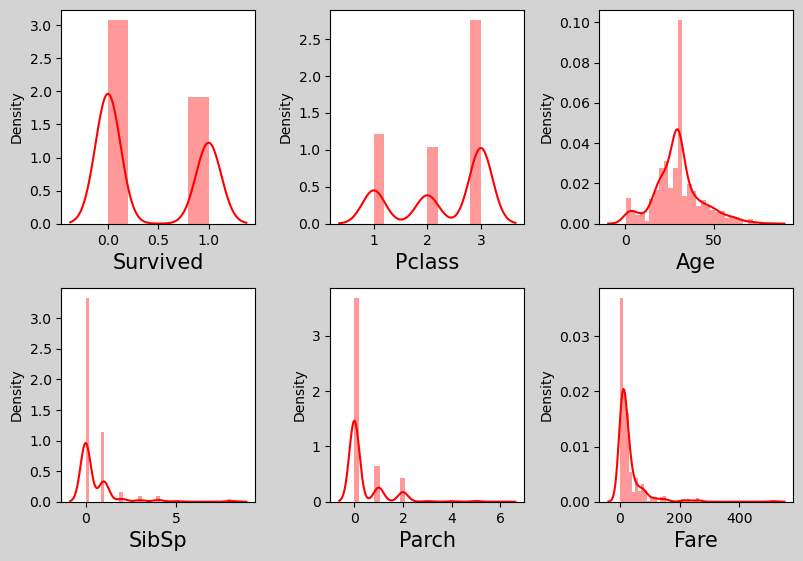

In [36]:
plt.figure(figsize=(8,8),facecolor='lightgrey')
plotnumber=1
for i in numerical_col:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[i],color='r')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Encoding the Categorical column

In [13]:
# Using Label encoder for transforming Categorical data
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in categorical_col:
    df[i] = le.fit_transform(df[i])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# Spliting features and target

In [14]:
x = df.drop(['Survived'], axis =1)
y = df['Survived']

In [15]:
print(x.shape,y.shape)

(891, 7) (891,)


# Model building

In [44]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [17]:
#scaling the x values
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x_scale = st.fit_transform(x)

In [18]:
#spliting train and test data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.2,random_state=2)


In [19]:
print(x_train.shape,y_train.shape)

(712, 7) (712,)


In [20]:
print(x_test.shape,y_test.shape)

(179, 7) (179,)


# Finding Best Random State

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(50,300):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8603351955307262 on Random_state 232


In [118]:
np.unique(y)

array([0, 1], dtype=object)

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=.25,random_state=232)

In [27]:
print(x_train.shape,y_train.shape)

(668, 7) (668,)


In [28]:
print(x_test.shape,y_test.shape)

(223, 7) (223,)


# LogisticRegression


In [33]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)

print('LogestickRegression Evaluation:')
print('\n')
print('Accuracy score :',accuracy_score(y_test,pred))
print('\n')
print('Confussion matrix :\n',confusion_matrix(y_test,pred))
print('\n')
print('Classification report:\n',classification_report(y_test,pred))


LogestickRegression Evaluation:


Accuracy score : 0.8430493273542601


Confussion matrix :
 [[130  10]
 [ 25  58]]


Classification report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       140
           1       0.85      0.70      0.77        83

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.84       223



Here Logestickregression gives best accuracy score that is 0.84

# Saving the model

In [55]:
import joblib
joblib.dump(lg,'Titanic_survived.obj')

['Titanic_survived.obj']

# Final prediction

In [56]:
prediction = lg.predict(x_test)
Actual = np.array(y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,1
3,1,1
4,1,1
